**CNN Autoencoder with CIFAR-10**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.layers import UpSampling2D
from tensorflow.keras import layers, models
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Conv2DTranspose, Flatten, Dense, Reshape

In [ ]:
(x_train, _), (x_test, _) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step


In [ ]:
# Normalize pixel values to [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [ ]:
# Define the CNN Autoencoder
input_shape = x_train.shape[1:]

In [ ]:
# Encoder
encoder = models.Sequential([
    layers.Input(shape=input_shape),
    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2), padding='same'),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2), padding='same')
])

In [ ]:
# Decoder
decoder = models.Sequential([
    layers.Conv2DTranspose(64, (3, 3), activation='relu', padding='same'),
    layers.UpSampling2D((2, 2)),
    layers.Conv2DTranspose(32, (3, 3), activation='relu', padding='same'),
    layers.UpSampling2D((2, 2)),
    layers.Conv2DTranspose(3, (3, 3), activation='sigmoid', padding='same')
])

In [ ]:
autoencoder = models.Sequential([encoder, decoder])
autoencoder.compile(optimizer='adam', loss='mse')


In [ ]:
history = autoencoder.fit(x_train, x_train, epochs=20, batch_size=128, validation_split=0.2, verbose=1)

Epoch 1/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step - loss: 0.0210 - val_loss: 0.0061
Epoch 2/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.0059 - val_loss: 0.0048
Epoch 3/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0048 - val_loss: 0.0043
Epoch 4/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0044 - val_loss: 0.0040
Epoch 5/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0042 - val_loss: 0.0037
Epoch 6/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0038 - val_loss: 0.0040
Epoch 7/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0036 - val_loss: 0.0034
Epoch 8/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0035 - val_loss: 0.0033
Epoch 9/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0033 - val_loss: 0.0031
Epoch 10/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0031 - val_loss: 0.0030
Epoch 11/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0030 - val_loss: 0.0028
Epoch 12/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/st

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


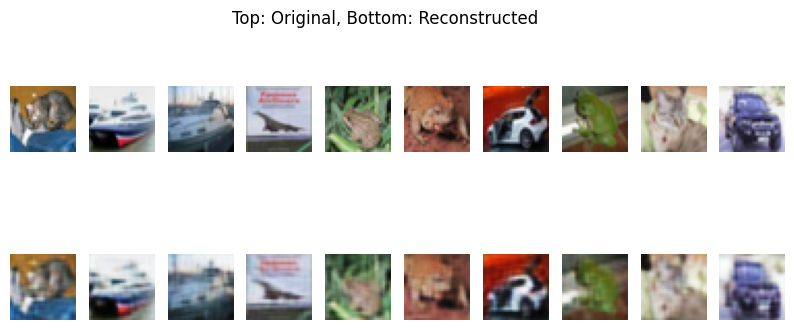

In [ ]:
# Visualize Input vs Reconstructed Images
decoded_imgs = autoencoder.predict(x_test[:10])

plt.figure(figsize=(10, 4))
for i in range(10):
    # Original Images
    plt.subplot(2, 10, i + 1)
    plt.imshow(x_test[i])
    plt.axis('off')

    # Reconstructed Images
    plt.subplot(2, 10, i + 11)
    plt.imshow(decoded_imgs[i])
    plt.axis('off')
plt.suptitle("Top: Original, Bottom: Reconstructed")
plt.show()

In [ ]:
#MSE
reconstructed_imgs = autoencoder.predict(x_test)
mse = np.mean([mean_squared_error(x_test[i].flatten(), reconstructed_imgs[i].flatten()) for i in range(len(x_test))])
from sklearn.decomposition import PCA
from sklearn.manifold import TSNEprint("Mean Squared Error:", mse)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Mean Squared Error: 0.0023078213


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


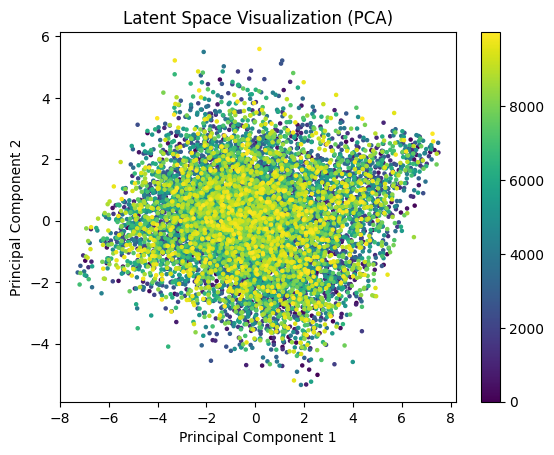

In [ ]:
# Extract latent space representations
latent_space = encoder.predict(x_test)

# Flatten the latent space
latent_space_flat = latent_space.reshape(latent_space.shape[0], -1)

#PCA
pca = PCA(n_components=2)
latent_pca = pca.fit_transform(latent_space_flat)

# Visualizing PCA
plt.scatter(latent_pca[:, 0], latent_pca[:, 1], c=np.arange(len(latent_pca)), cmap='viridis', s=5)
plt.colorbar()
plt.title("Latent Space Visualization (PCA)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

**Key Questions**

1. How does the CNN autoencoder perform in reconstructing images?

  The reconstructed images are visually similar to the original images, although some details may be blurred due to compression.with a Mean Squared Error (MSE) of 0.0023. This indicates that the average pixel-wise difference between the original and reconstructed images is minimal.

2. What insights do you gain from visualizing the latent space?

  The PCA visualization of the latent space shows a dense central region, where most data points cluster closely together, indicating that the autoencoder has effectively captured common features across the dataset. The points are distributed fairly uniformly without distinct separations, suggesting that the autoencoder encodes data in a continuous latent space rather than learning class-specific features. The range of the principal components spans approximately -8 to 8 on both axes, reflecting the variability in the encoded features. The color gradient, as represented by the color bar, may correspond to a property such as data index, reconstruction error, or class labels, which highlights subtle patterns in feature representation. Overall, the lack of distinct clusters implies that the autoencoder prioritizes general data reconstruction over capturing discrete categories inherent to the dataset.

**LSTM Autoencoder**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, RepeatVector, TimeDistributed
from tensorflow.keras import layers
from sklearn.metrics import mean_squared_error

In [ ]:
data = pd.read_csv('/content/HistoricalQuotes.csv')
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

In [ ]:
data.shape

(2518, 5)

In [ ]:
print(data.describe())

             Volume
count  2.518000e+03
mean   7.258009e+07
std    5.663113e+07
min    1.136205e+07
25%    3.053026e+07
50%    5.295469e+07
75%    9.861006e+07
max    4.624423e+08


In [ ]:
print(data.head())

           Close/Last     Volume      Open      High       Low
Date                                                          
2020-02-28    $273.36  106721200   $257.26   $278.41   $256.37
2020-02-27    $273.52   80151380    $281.1      $286   $272.96
2020-02-26    $292.65   49678430   $286.53   $297.88    $286.5
2020-02-25    $288.08   57668360   $300.95   $302.53   $286.13
2020-02-24    $298.18   55548830   $297.26   $304.18   $289.23


In [ ]:
#data[' Close/Last'] = data[' Close/Last'].replace('[\$,]', '', regex=True).astype(float)
data[' Close/Last'] = data[' Close/Last'].replace({'\$': '', ',': ''}, regex=True)
data[' Close/Last'] = data[' Close/Last'].astype(float)

stock_prices = data[' Close/Last'].values.reshape(-1, 1)

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
stock_prices_scaled = scaler.fit_transform(stock_prices)

In [ ]:
# Create sequences for LSTM (e.g., using 30 days as input for each sequence)
sequence_length = 30
X = []
y = []

for i in range(len(stock_prices_scaled) - sequence_length):
    X.append(stock_prices_scaled[i:i+sequence_length, 0])
    y.append(stock_prices_scaled[i+sequence_length, 0])

X = np.array(X)
y = np.array(y)

In [ ]:
X = X.reshape((X.shape[0], X.shape[1], 1))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Define the LSTM Autoencoder model
def build_lstm_autoencoder(input_shape):
    model = Sequential()

    # Encoder
    model.add(LSTM(128, activation='relu', input_shape=input_shape, return_sequences=False))

    # Latent space representation
    model.add(RepeatVector(sequence_length))

    # Decoder
    model.add(LSTM(128, activation='relu', return_sequences=True))
    model.add(TimeDistributed(Dense(1)))

    model.compile(optimizer='adam', loss='mse')
    return model

# Build the model
model = build_lstm_autoencoder((X_train.shape[1], 1))
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 128)                 │          66,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ repeat_vector (RepeatVector)         │ (None, 30, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 30, 128)             │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ time_distributed (TimeDistributed)   │ (None, 30, 1)               │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 198,273 (774.50 KB)

 Trainable params: 198,273 (774.50 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train the model
history = model.fit(X_train, X_train, epochs=20, batch_size=32, validation_data=(X_test, X_test), verbose=1)

Epoch 1/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 2.4226e-04 - val_loss: 2.2083e-04
Epoch 2/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 2.4440e-04 - val_loss: 2.3448e-04
Epoch 3/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 2.5294e-04 - val_loss: 2.2356e-04
Epoch 4/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 2.4375e-04 - val_loss: 2.2805e-04
Epoch 5/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 2.7033e-04 - val_loss: 2.1906e-04
Epoch 6/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 2.5217e-04 - val_loss: 7.5790e-04
Epoch 7/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 7.7913e-04 - val_loss: 3.6489e-04
Epoch 8/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 3.5710e-04 - val_loss: 3.2694e-04
Epoch 9/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 3.0242e-04 - val_loss: 2.1990e-04
Epoch 10/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 2.3974e-04 - val_loss: 2.5440e-04
Epoch 11/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 2.4682e-0

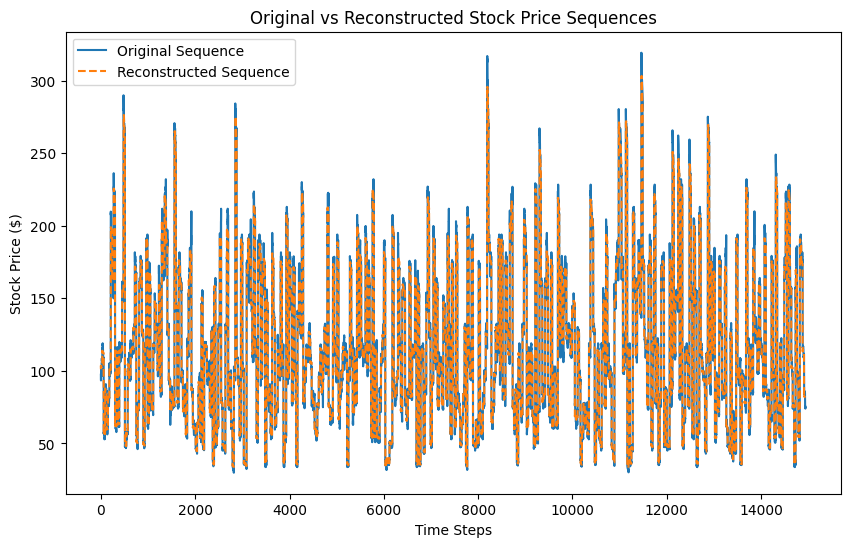

In [ ]:
# Predict the reconstructed sequences on test set
X_pred = model.predict(X_test)

# Inverse transform to get the original stock prices (from scaled data)
X_test_inv = scaler.inverse_transform(X_test.reshape(-1, 1))
X_pred_inv = scaler.inverse_transform(X_pred.reshape(-1, 1))

# Plotting original vs reconstructed stock prices
plt.figure(figsize=(10, 6))
plt.plot(X_test_inv, label="Original Sequence")
plt.plot(X_pred_inv, label="Reconstructed Sequence", linestyle='dashed')

plt.xlabel("Time Steps")
plt.ylabel("Stock Price ($)")
plt.legend()
plt.title("Original vs Reconstructed Stock Price Sequences")
plt.show()


In [ ]:
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(X_test_inv, X_pred_inv)
print(f'Mean Squared Error (MSE): {mse}')


Mean Squared Error (MSE): 18.5906387823567


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


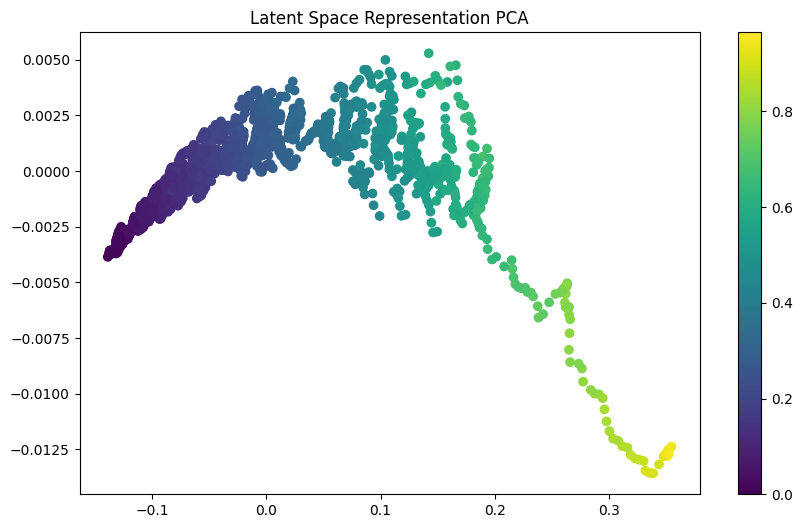

In [ ]:
# Extract the encoder part of the model to get the latent representations
encoder = Sequential()
encoder.add(LSTM(128, activation='relu', input_shape=(X_train.shape[1], 1), return_sequences=False))

# Fit the encoder to get the latent space representation
latent_representations = encoder.predict(X_train)

# Visualize latent representations
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
latent_pca = pca.fit_transform(latent_representations)

plt.figure(figsize=(10, 6))
plt.scatter(latent_pca[:, 0], latent_pca[:, 1], c=y_train, cmap='viridis')
plt.colorbar()
plt.title("Latent Space Representation PCA")
plt.show()


**Key Questions**
1. How well does the LSTM autoencoder reconstruct the sequences?

  The LSTM autoencoder will aim to reconstruct the stock price sequences based on the latent representation. By comparing the reconstructed sequences to the original ones using MSE, you can evaluate how well the model learns the temporal dependencies and reconstructs the stock price data. A lower MSE value indicates better reconstruction quality.

2. How does the choice of latent space dimensionality affect reconstruction quality and compression?

  The number of LSTM units in the encoder and decoder determines the latent space dimensionality. If the latent space is too small, the reconstruction may lose important information, resulting in higher MSE and a less accurate reconstruction. A larger latent space retains more information but may reduce the compression efficiency. You can experiment with different LSTM unit sizes to find a balance between reconstruction quality and dimensionality.